### Завдання:

Створіть власний набір даних для регресії.
Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.
Спробуйте покращити результати, використовуючи такі підходи:
Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).
Збільшення кількості нейронів у кожному шарі.
Ознайомтеся з документацією Adam та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?
Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?
Знайдіть відповідний код та побудуйте графік зміни функції втрат на тренувальному та тестувальному наборі даних під час тренування останньої моделі.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
# import seaborn as sns
# import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
X, y = make_regression(n_samples= 2000, n_features=5, n_informative=10, noise = 15, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# fit the model
first_model = model.fit(X_train, y_train, epochs = 200, verbose=0, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 11.3813 - mae: 11.3813


[11.381263732910156, 11.381263732910156]

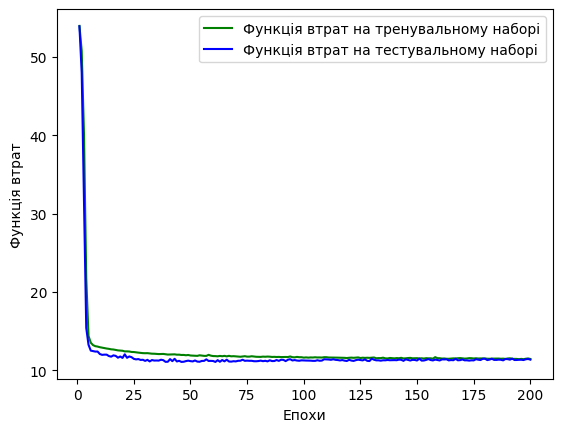

In [25]:
train_loss = first_model.history['loss']
val_loss = first_model.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Функція втрат на тренувальному наборі')
plt.plot(epochs, val_loss, 'b', label='Функція втрат на тестувальному наборі')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.legend()
plt.show()

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compiling the model
model_2.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# fit the model
model_2.fit(X_train, y_train, epochs = 200, verbose=0)
model_2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 12.6662 - mae: 12.6662


[12.666175842285156, 12.666175842285156]

In [14]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compiling the model
model_3.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ['mae'])

# fit the model
model_3.fit(X_train, y_train, epochs = 200, verbose=0)
model_3.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 13.2721 - mae: 13.2721


[13.272113800048828, 13.272113800048828]

In [15]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Зміна швидкості навчання Adam
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Збільшено learning_rate
model_4.compile(optimizer=custom_optimizer, loss=tf.keras.losses.mae, metrics = ['mae'])

# fit the model
model_4.fit(X_train, y_train, epochs = 200, verbose=0)
model_4.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 14.7670 - mae: 14.7670


[14.767033576965332, 14.767033576965332]

In [20]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Зміна швидкості навчання Adam
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Збільшено learning_rate
model_5.compile(optimizer=custom_optimizer, loss=tf.keras.losses.mae, metrics = ['mae'])

# fit the model
last_model = model_5.fit(X_train, y_train, epochs = 300, verbose=0, validation_data=(X_test, y_test))
model_5.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 15.0696 - mae: 15.0696


[15.069622039794922, 15.069622039794922]

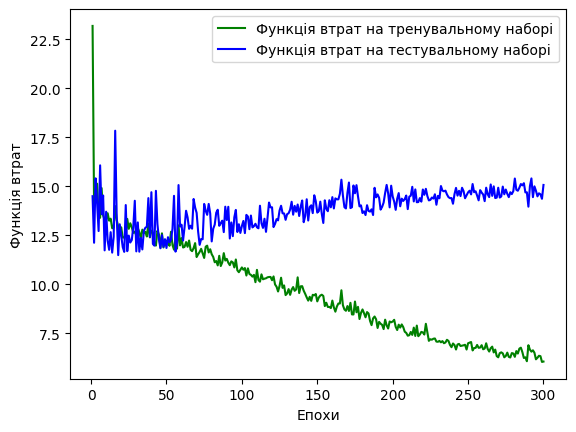

In [21]:
train_loss = last_model.history['loss']
val_loss = last_model.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Функція втрат на тренувальному наборі')
plt.plot(epochs, val_loss, 'b', label='Функція втрат на тестувальному наборі')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.legend()
plt.show()